In [ ]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Developing a multi bandit environment ..with rewards drawn from a normal distribution
## with means specified for each bandit and unit variance.

class MultiArmBanditsEnv(gym.Env):

  def __init__(self,K,means,std = 1):
    assert len(means) == K, 'Enter K no. of means'
    super(MultiArmBanditsEnv,self).__init__()

    self.K = K ## no. of arms
    self.action_space = spaces.Discrete(self.K)
    self.observation_space = spaces.Discrete(1) ## single space problem
    self.means = means
    self.std = std

  def step(self,action):

    reward = np.random.normal(self.means[action],self.std)
    obs, done, info = 0,False,dict()

    return obs,reward,done,info

    

In [ ]:
### Understanding the env
env = MultiArmBanditsEnv(3,[-10,0,10])
print(env.K)
print(env.reset)
for action in range(3):
  _,reward,_,_ = env.step(action)
  print("Reward for bandit {} is {}".format(action, reward))

3
<bound method Env.reset of <__main__.MultiArmBanditsEnv object at 0x7f0761c77f90>>
Reward for bandit 0 is -11.882210398523437
Reward for bandit 1 is -0.32383128690193613
Reward for bandit 2 is 8.030797671808017


# Greedy Agent

In [64]:
#### Greedy Agent implementation

class GreedyAgent(object):
  def __init__(self,env,M,N):
    self.env = env
    self.M = M ## M to stop exploring
    self.N = N ## total no. of rounds
    self.R_list = [] ## list of rewards collected after each round for N rounds
    self.Q = np.zeros(self.env.K) ### Keep track of Q values
    self.N_a = np.zeros(self.env.K) ## to keep track of no. of times the a th arm is pulled

    self.action_count = np.zeros(self.env.K)
    self.regret_list = []

    assert self.M*self.env.K < self.N , 'enter a low value of M'

  def get_action(self):
    action = np.argmax(self.Q)
    #self.action_count[action] += 1 
    return action

  def run(self):
    #self.env.reset()
    self.t = 0

    for m in range(self.M):
      for a in range(self.env.K):
        _,r,_,_ = self.env.step(a)
        self.R_list.append(r)
        self.N_a[a] +=1
        self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
        self.t += 1

        self.action_count[a] += 1 
        r_t = np.amax(self.Q) - (self.Q[a])
        self.regret_list.append(r_t)
        

    while(self.t < self.N):
      a = self.get_action()
      _,r,_,_ = self.env.step(a)
      self.R_list.append(r)
      self.N_a[a] +=1
      self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
      self.t += 1

      ## For action counts 
      self.action_count[a] += 1 
      r_t = np.amax(self.Q) - (self.Q[a])
      self.regret_list.append(r_t)



# eps - greedy agent

In [99]:
#### Greedy Agent implementation

class eps_GreedyAgent(object):
  def __init__(self,env,M,N,eps):
    self.env = env
    self.M = M ## M to stop exploring
    self.N = N ## total no. of rounds
    self.eps = eps
    self.R_list = [] ## list of rewards collected after each round for N rounds
    self.Q = np.zeros(self.env.K) ### Keep track of Q values
    self.N_a = np.zeros(self.env.K) ## to keep track of no. of times the a th arm is pulled

    self.action_count = np.zeros(self.env.K)
    self.regret_list = []

    assert self.M*self.env.K < self.N , 'enter a low value of M'

  def get_action(self):

    p = np.random.random()
    if(p < 1- self.eps):
      #print('Chose greedy')
      return np.argmax(self.Q)
      
    
    #print('Chose random')
    return np.random.choice(self.env.K)

  def run(self):

    self.t = 0

    for m in range(self.M):
      for a in range(self.env.K):
        _,r,_,_ = self.env.step(a)
        self.R_list.append(r)
        self.N_a[a] +=1
        self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
        self.t += 1

        self.action_count[a] += 1 
        r_t = np.amax(self.Q) - (self.Q[a])
        self.regret_list.append(r_t)
        

    while(self.t < self.N):
      a = self.get_action()
      _,r,_,_ = self.env.step(a)
      self.R_list.append(r)
      self.N_a[a] +=1
      self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
      self.t += 1

      self.action_count[a] += 1 
      r_t = np.amax(self.Q) - (self.Q[a])
      self.regret_list.append(r_t)



# eps-decay greedy

In [117]:
#### Greedy Agent implementation

class epsDecay_GreedyAgent(object):
  def __init__(self,env,M,N,eps_start,eps_end,eps_decay):
    self.env = env
    self.M = M ## M to stop exploring
    self.N = N ## total no. of rounds

    self.eps_start = eps_start
    self.eps_end = eps_end
    self.eps_decay = eps_decay

    self.R_list = [] ## list of rewards collected after each round for N rounds
    self.Q = np.zeros(self.env.K) ### Keep track of Q values
    self.N_a = np.zeros(self.env.K) ## to keep track of no. of times the a th arm is pulled

    self.action_count = np.zeros(self.env.K)
    self.regret_list = []

    assert self.M*self.env.K < self.N , 'enter a low value of M'

  def get_action(self):

    p = np.random.random()
    #print(p)
    if(p < 1- self.eps):
      #print('Chose greedy')
      return np.argmax(self.Q)
      
    
    #print('Chose random')
    return np.random.choice(self.env.K)

  def run(self):

    self.t = 0
    self.eps = self.eps_start

    for m in range(self.M):
      for a in range(self.env.K):
        _,r,_,_ = self.env.step(a)
        self.R_list.append(r)
        self.N_a[a] +=1
        self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
        self.t += 1

        self.action_count[a] += 1 
        r_t = np.amax(self.Q) - (self.Q[a])
        self.regret_list.append(r_t)
        
    while(self.t < self.N):
      a = self.get_action()
      _,r,_,_ = self.env.step(a)
      self.R_list.append(r)
      self.N_a[a] +=1
      self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
      self.t += 1
      self.eps = max(self.eps_end, self.eps*self.eps_decay)
      #print(self.eps)

      self.action_count[a] += 1 
      r_t = np.amax(self.Q) - (self.Q[a])
      self.regret_list.append(r_t)



In [ ]:
### Running greedy agent
env = MultiArmBanditsEnv(3,[-10,0,10])
g_agent = epsDecay_GreedyAgent(env,M = 5, N = 100,eps_start = 1, eps_end = 0.01, eps_decay = 0.9)
g_agent.run()
plt.plot(np.arange(len(g_agent.R_list) ), g_agent.R_list)

# UCB1 Algo

In [118]:
#### UCB (Upper Confidence Bound) Agent implementation

class UCBAgent(object):
  def __init__(self,env,N):
    self.env = env
    self.N = N ## total no. of rounds
    self.R_list = [] ## list of rewards collected after each round for N rounds
    self.Q = np.zeros(self.env.K) ### Keep track of Q values
    self.N_a = np.zeros(self.env.K) ## to keep track of no. of times the a th arm is pulled

    self.action_count = np.zeros(self.env.K)
    self.regret_list = []


  def get_action(self):
    xploit_vec = self.Q
    xplore_vec =  np.array(list(map(lambda nt_a : ((2*np.log(self.t))/(nt_a))**0.5 ,self.N_a)))

    both = xploit_vec  + xplore_vec
    #print(xplore_vec)
    #print(both)
    #print(np.argmax(both))
    return np.argmax(both)
    
    

  def run(self):

    self.t = 0


    for a in range(self.env.K):
      _,r,_,_ = self.env.step(a)
      self.R_list.append(r)
      self.N_a[a] +=1
      self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
      self.t += 1

      self.action_count[a] += 1 
      r_t = np.amax(self.Q) - (self.Q[a])
      self.regret_list.append(r_t)
        
    while(self.t < self.N):
      #print(self.t)
      a = self.get_action()
      _,r,_,_ = self.env.step(a)
      self.R_list.append(r)
      self.N_a[a] +=1
      self.Q[a] =  self.Q[a] + (1/self.N_a[a])*(r - self.Q[a])
      self.t += 1

      self.action_count[a] += 1 
      r_t = np.amax(self.Q) - (self.Q[a])
      self.regret_list.append(r_t)




In [ ]:
### Running greedy agent
env = MultiArmBanditsEnv(3,[-10,0,10])
g_agent = UCBAgent(env, N = 100)
g_agent.run()
plt.plot(np.arange(len(g_agent.R_list) ), g_agent.R_list)

# Greedy Algo Agent

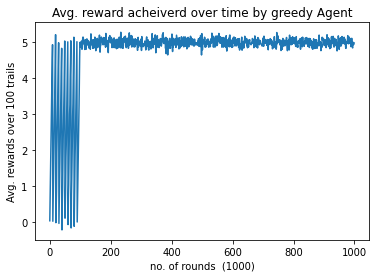

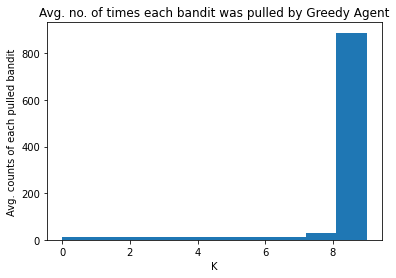

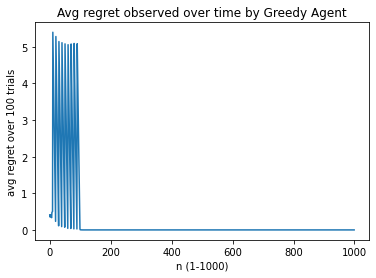

In [95]:
times = 100
rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,np.linspace(0,5,10))
  g_agent = GreedyAgent(env,M = 10, N = 1000)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)


rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_greedy = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by greedy Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by Greedy Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by Greedy Agent')
plt.show()

# Eps- greedy Agent : eps = 0.1

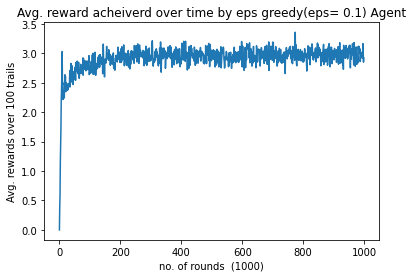

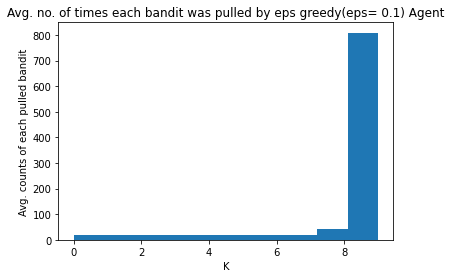

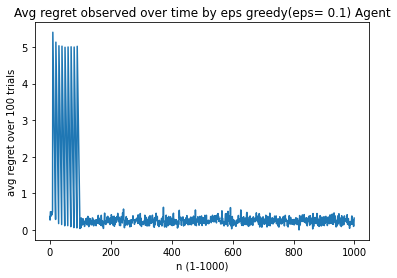

In [122]:
times = 100

rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,np.linspace(0,5,10))
  g_agent = eps_GreedyAgent(env,M = 10, N = 1000,eps = 0.1)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)


rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_eps_greedy1 = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by eps greedy(eps= 0.1) Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by eps greedy(eps= 0.1) Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by eps greedy(eps= 0.1) Agent')
plt.show()

# Eps- greedy Agent : eps = 0.01

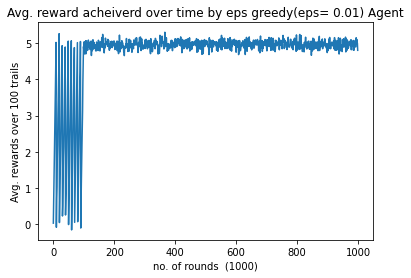

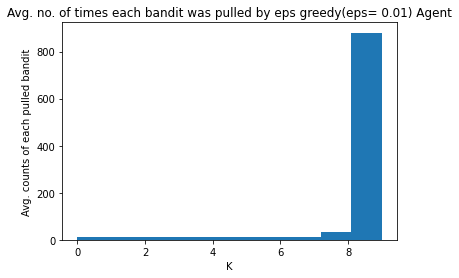

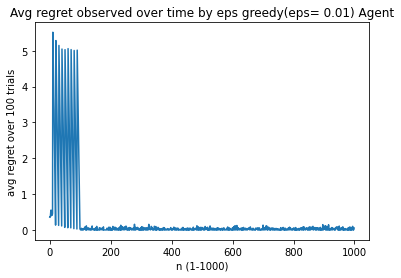

In [123]:
times = 100

rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,np.linspace(0,5,10))
  g_agent = eps_GreedyAgent(env,M = 10, N = 1000,eps = 0.01)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)


rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_eps_greedy2 = np.mean(rewards_times,axis = 0)

mean_rewards_greedy = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by eps greedy(eps= 0.01) Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by eps greedy(eps= 0.01) Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by eps greedy(eps= 0.01) Agent')
plt.show()

# eps-decay eps: 1---> 0.01

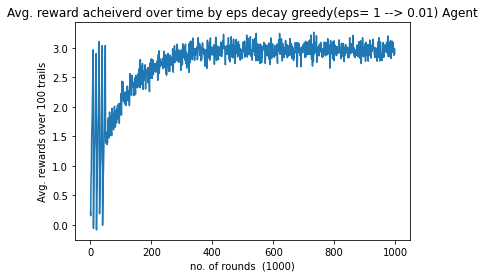

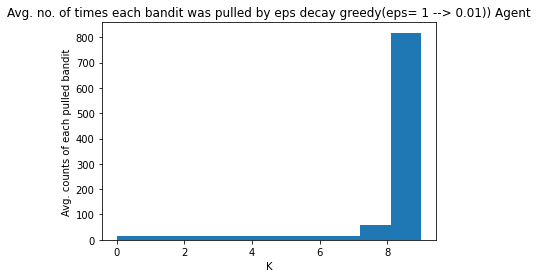

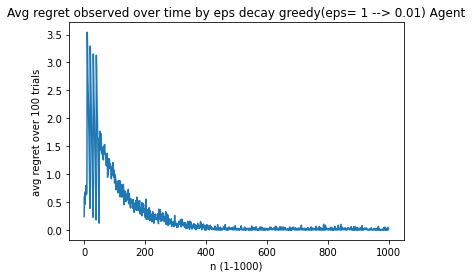

In [124]:
times = 100
rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,np.linspace(0,3,10))
  g_agent = epsDecay_GreedyAgent(env,M = 5, N = 1000,eps_start = 1, eps_end = 0.01, eps_decay = 0.99)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)


rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_eps_decay_greedy = np.mean(rewards_times,axis = 0)

mean_rewards_greedy = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by eps decay greedy(eps= 1 --> 0.01) Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by eps decay greedy(eps= 1 --> 0.01)) Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by eps decay greedy(eps= 1 --> 0.01) Agent')
plt.show()

# UCB Agent Training

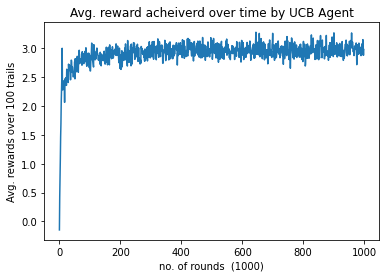

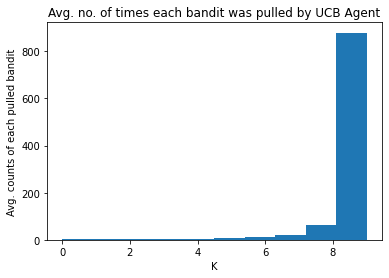

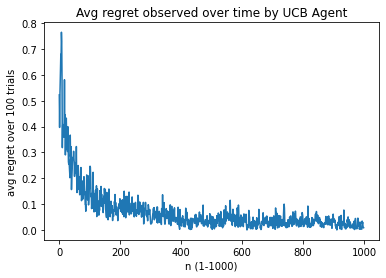

In [125]:
times = 100
rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,np.linspace(0,3,10))
  g_agent = g_agent = UCBAgent(env, N = 1000)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)

mean_rewards_UCB = np.mean(rewards_times,axis = 0)
rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_greedy = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by UCB Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by UCB Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by UCB Agent')
plt.show()

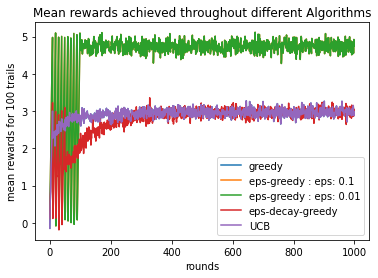

In [127]:
plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy, label = 'greedy')
plt.plot(np.arange(len(mean_rewards_eps_greedy1) ), mean_rewards_eps_greedy, label= 'eps-greedy : eps: 0.1')
plt.plot(np.arange(len(mean_rewards_eps_greedy2) ), mean_rewards_eps_greedy, label= 'eps-greedy : eps: 0.01')

plt.plot(np.arange(len(mean_rewards_eps_decay_greedy) ), mean_rewards_decay_greedy, label = 'eps-decay-greedy')
plt.plot(np.arange(len(mean_rewards_UCB) ), mean_rewards_UCB,label = 'UCB')
plt.legend()
plt.title('Mean rewards achieved throughout different Algorithms')
plt.xlabel('rounds')
plt.ylabel('mean rewards for 100 trails')
plt.show()

## Q 2c : N = 1000, times_ran = 100,
Bandits No. K = 10

Respective mean rewards of each bandits : 

[0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]

For naive algorithms : Chosen M = 10, N =1000, times_ran = 100

# Avg. rewards acheived through different algorithms


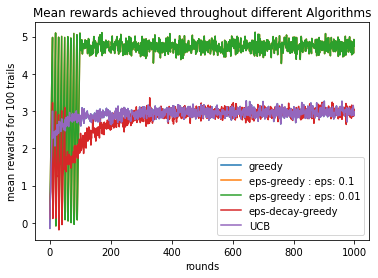

# Q2d) Hists for average no. of times a bandit has been triggered for all implemented algos

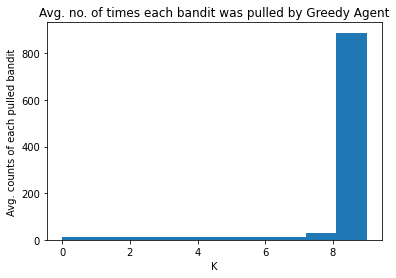


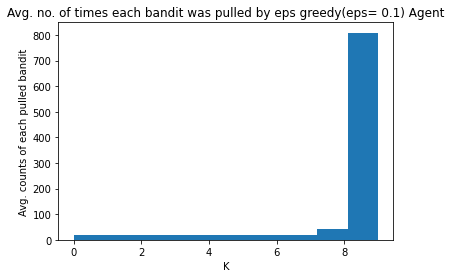




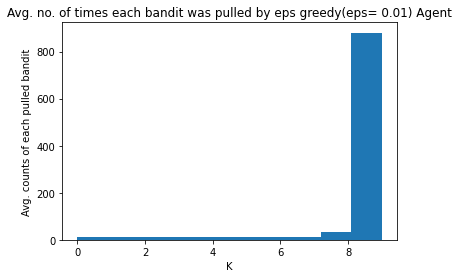

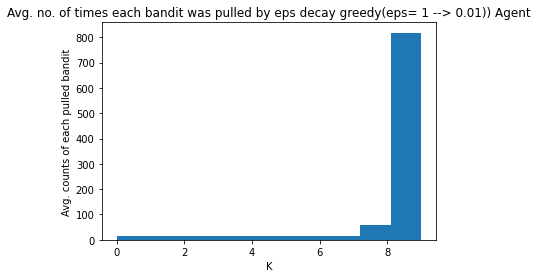

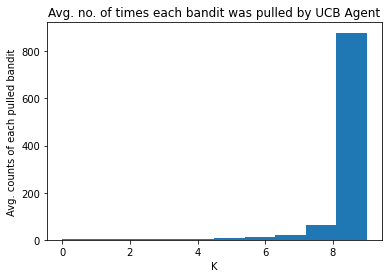

# Q2 e)  Avg. regret values over different algorithms

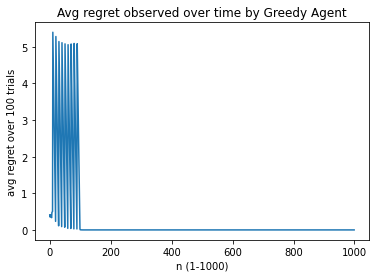

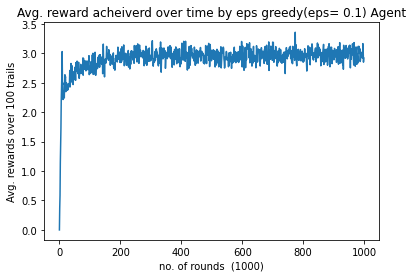

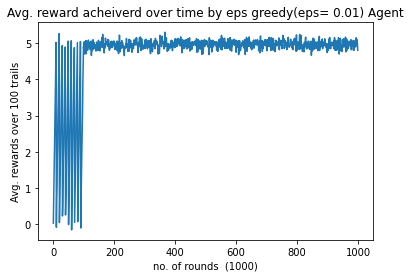

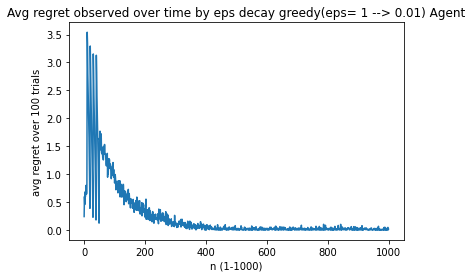

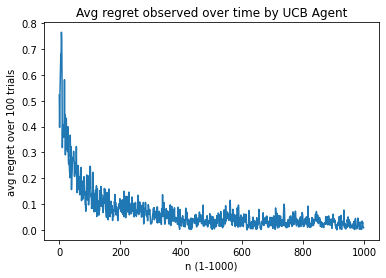

# Q2f) Which Algorithm is the best ..?

The UCB algorithm works the best , all it requires is to ensure  that each action has taken place atleast once, and the objective function takes into account both exploration and exploitation by itself.

# Q2g) Considered 10 bandits  and solved using UCB algo

with mean rewards : [2,4,6,8,10,12,14,16,18, 18.1] we can see that the bandits K=8 , K=9 , rewards are close , but ideally K=9(should be the best choice)

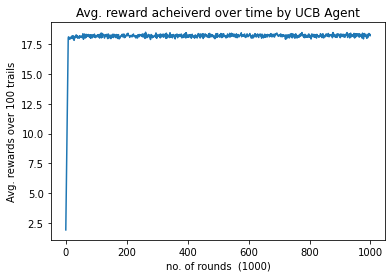

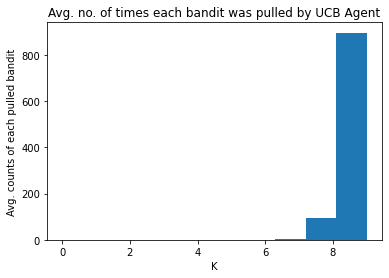

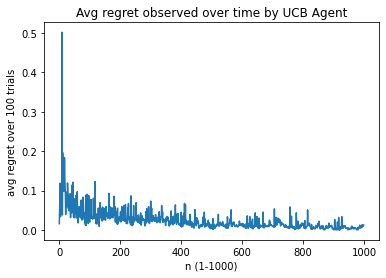

In [129]:
times = 100
rewards_times = []
regret_times = []
action_count_times = []

for time in range(times):
  ### Running greedy agent
  env = MultiArmBanditsEnv(10,[2,4,6,8,10,12,14,16,18, 18.1])
  g_agent = g_agent = UCBAgent(env, N = 1000)
  g_agent.run()
  rewards_times.append(g_agent.R_list)
  regret_times.append(g_agent.regret_list)
  action_count_times.append(g_agent.action_count)

mean_rewards_UCB = np.mean(rewards_times,axis = 0)
rewards_times = np.array(rewards_times)
regret_times = np.array(regret_times)
action_count_times = np.array(action_count_times)

mean_rewards_greedy = np.mean(rewards_times,axis = 0)
mean_regret_times_greedy = np.mean(regret_times, axis = 0)
mean_action_count_times_greedy = np.mean(action_count_times, axis =0)

plt.plot(np.arange(len(mean_rewards_greedy) ), mean_rewards_greedy)
plt.xlabel('no. of rounds  (1000)')
plt.ylabel('Avg. rewards over 100 trails')
plt.title('Avg. reward acheiverd over time by UCB Agent')
plt.show()

plt.hist(np.arange(10),weights = mean_action_count_times_greedy)
plt.xlabel('K')
plt.ylabel('Avg. counts of each pulled bandit')
plt.title('Avg. no. of times each bandit was pulled by UCB Agent')
plt.show()


plt.plot(np.arange(len(mean_regret_times_greedy) ), mean_regret_times_greedy)
plt.xlabel('n (1-1000)')
plt.ylabel('avg regret over 100 trials')
plt.title('Avg regret observed over time by UCB Agent')
plt.show()

# Observations
 We used the best performing algorithm from the above observations and tested it on the given setting with bandits having very close mean rewards. We can observe that the mean achieved at the end is 18.1(close to). And the actions chosen for the Bandit(K=9)(0 indexed) is the highest this proves the efficacy of the UCB algo

# THE END